In [1]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
import numpy as np
import email
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
spam_cat = 1
ham_cat = 0
vocab_size = 2500

In [3]:
def get_message_text(eml_file_path):
    with open(eml_file_path, 'r') as file:
        try:
            message = email.message_from_file(file)
        except:
            return 'no_decode'
        if message.is_multipart():
            for part in message.walk():
                # Если письмо многочастное, обрабатываем каждую его часть
                if part.get_content_type() == 'text/plain':
                    try: 
                        return part.get_payload(decode=True).decode()
                    except:
                        return 'no_decode'
        else:
            try:
                return message.get_payload(decode=True).decode()
            except:
                return 'no_decode'

In [4]:
# spam_emails:
df_spam = pd.DataFrame(columns=['DocId','message','category'])
# df_spam = pd.DataFrame({'name':'111','message':'111','category':'1'})
folder_path = r'c:\temp\spam'  # Укажите путь к папке с файлами .eml

for file_name in os.listdir(folder_path):
    if file_name.endswith(".eml"):
        file_path = os.path.join(folder_path, file_name)
        message_text = get_message_text(file_path)
        df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True) 

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spam = df_spam.append({'DocId':file_name, 'message':message_text, 'category':1}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\3403477786.py:10: FutureWarning:

In [5]:
# ham_emails
df_ham = pd.DataFrame({'DocId':[],'message':[],'category':[]})
# df_spam = pd.DataFrame({'name':'111','message':'111','category':'1'})
folder_path = r'c:\temp\ham_mail'  # Укажите путь к папке с файлами .eml

for file_name in os.listdir(folder_path):
    if file_name.endswith(".eml"):
        file_path = os.path.join(folder_path, file_name)
        message_text = get_message_text(file_path)
        df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ham = df_ham.append({'DocId':file_name, 'message':message_text, 'category':0}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_3296\218468942.py:10: FutureWarning: The frame

In [6]:
data = pd.concat([df_spam, df_ham])
data['DocId'] = [i for i in range(len(data))]
data = data.astype({'DocId':'int64','category':'int64','message':'str'})
data = data.set_index('DocId')

In [7]:
data

,message,category
DocId,,
0,0% Interest. Real Protection. \n\nGet a Safer...,1
1,None,1
2,None,1
3,Let us protect your\nhome from pests\nthis sum...,1
4,None,1
...,...,...
1377,Тинькофф \n\n Подробности расчета в письме\...,0
1378,Тинькофф \n\n Подробности расчета в письме\...,0
1379,Тинькофф \n\n Подробности расчета в письме\...,0


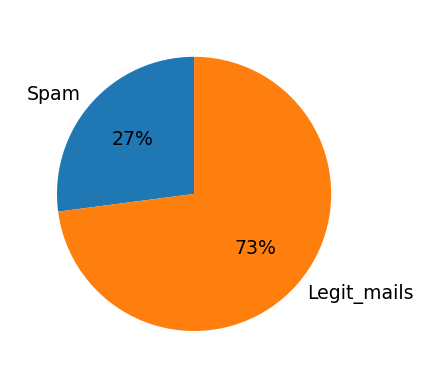

In [8]:
amount_of_spam = data.category.value_counts()[1]
amount_of_ham = data.category.value_counts()[0]

category_names = ['Spam', 'Legit_mails']
sizes = [amount_of_spam, amount_of_ham]

plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize':6}, startangle=90, autopct='%1.0f%%')
plt.show()

In [9]:
def clean_msg_no_html(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words())):
    if message is not None or type(message) == 'NoneType':
        #REMOVE HTML TAGS
        soup = BeautifulSoup(message, 'html.parser')
        cleanned_text = soup.get_text()

        #converts to lower words
        words = word_tokenize(cleanned_text.lower())
        filtered_words = []

        for word in words:
            if word not in stop_words and word.isalpha():
                filtered_words.append(stemmer.stem(word))

        return filtered_words
    else:
        return ['None', 'Type']

In [10]:
stemmed_nested_list = data.message.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

C:\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [11]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('uniq_words is ', unique_words.shape[0])
unique_words.head()

uniq_words is  7363


http     3891
link     1690
imag     1110
полис     364
العمل     320
dtype: int64

In [12]:
vocab_size = unique_words.shape[0]
word_ids = list(range(0, vocab_size))
vocab = pd.DataFrame({'VOCAB_WORD': unique_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
word_list = list(vocab['VOCAB_WORD'])
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,link
2,imag
3,полис
4,العمل


In [13]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361
0,interest,real,protect,safer,safer,smarter,home,http,smart,flexibl,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,protect,home,pest,summer,save,pest,control,plan,free,estim,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [14]:
# Splitting the datainto a Training and Testing dataset
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.category, test_size=0.3)

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361
648,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
924,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
772,уважением,semzh,zhalsanzhapova,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1308,здравствуйте,пользоваться,новой,почтой,добро,пожаловать,новую,почту,подготовили,несколько,...,None,None,None,None,None,None,None,None,None,None
156,secur,summer,unlock,advanc,home,secur,famili,protect,http,interest,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,тинькофф,билеты,заказу,qtvfob,маршрутная,квитанция,вложении,личном,кабинете,http,...,None,None,None,None,None,None,None,None,None,None
630,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
722,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
635,здравствуйте,базаров,кирилл,олегович,ваши,результаты,готовы,просмотра,скачайте,файл,...,None,None,None,None,None,None,None,None,None,None


In [16]:
# Create a Sparse matrix for the Training data

def make_sparse_matrix(df, list_words, labels):
    
    # Return a sparse matrix as dataframe
    # df - a dataframe with words in the columns with a document id as an index (X_train or X_test)
    # indexed_words - indexed of words by word id
    # labels - category as a series (y_train or y_test)
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    
    dict_list = []
    for i in range(nr_rows):
        for j in range(nr_cols):
            word = df.iat[i, j]
            if word in list_words:
                doc_id = df.index[i]
                word_id = list_words.index(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id, 'OCCURENCE': 1, 'WORD_ID': word_id}
                dict_list.append(item)
    return pd.DataFrame(dict_list)

In [ ]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_list, y_train)

In [ ]:
sparse_train_df.shape

In [26]:
# Combine Occurence with the Pandas groupby() method

train_grouped = sparce_train_df.group_by(['DOC_ID','WORD_ID','LABEL']).sum()
train_grouped.head()

NameError: name 'sparce_train_df' is not defined

In [ ]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_ids, y_train)

In [ ]:
# Combine Occurence with the Pandas groupby() method

train_grouped = sparce_train_df.group_by(['DOC_ID','WORD_ID','LABEL']).sum()
train_grouped.head()

In [ ]:
sparse_train_data = train_grouped.to_numpy()
